# 1. Dataset Loading and Basic Overview

In this section, the official UNSW-NB15 training and testing splits are loaded.
The four original CSV parts are not merged in order to avoid any potential data
leakage between training and testing. After loading, basic shape information and
sample rows are inspected to verify that the data has been imported correctly.


In [1]:
# Including the libraries and datasets required for the project:

from pathlib import Path
import numpy as np
import pandas as pd

# The part where you specify a constant number so that the code gives the same results each time it is run:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Let's select the folder containing the datasets as the project root:
PROJECT_ROOT = Path(".")

# Let's define the paths of our training and test files and print them to the screen.
train_path = PROJECT_ROOT / "UNSW_NB15_training-set.csv"
test_path  = PROJECT_ROOT / "UNSW_NB15_testing-set.csv"

print("Train CSV path:", train_path.resolve())
print("Test  CSV path:", test_path.resolve())

Train CSV path: /Users/cansenol/Desktop/THESIS/UNSW_NB15/OneDrive_1_06.10.2025/CSV Files/Training and Testing Sets/UNSW_NB15_training-set.csv
Test  CSV path: /Users/cansenol/Desktop/THESIS/UNSW_NB15/OneDrive_1_06.10.2025/CSV Files/Training and Testing Sets/UNSW_NB15_testing-set.csv


In [2]:
# We're expanding our pandas display settings to display more columns on the screen.
pd.set_option("display.max_columns", 50)


In [3]:
# We read our training and test CSV files and print the sizes of the files.
train = pd.read_csv(train_path, low_memory=False)
test  = pd.read_csv(test_path,  low_memory=False)

print("Train shape:", train.shape)
print("Test shape :", test.shape)


Train shape: (175341, 45)
Test shape : (82332, 45)


In [4]:
# Let's examine the first five rows from both of these data sets.
print("\nTrain example rows:")
display(train.head(5))

print("\nTest example rows:")
display(test.head(5))



Train example rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0



Test example rows:


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


# 2. Label Creation and Basic Data Cleaning  

In this section, the attack/normal label column is created consistently and 
verified for correctness. Afterward, network-identifier fields such as IP 
addresses, port numbers, and the flow ID are removed to prevent the model from 
learning artificially discriminative patterns (data leakage). Unnecessary 
whitespace is cleaned from text-based fields, and any text values that represent 
numeric data are safely converted into numeric type. Finally, the cleaned feature 
set is prepared for subsequent preprocessing and modeling steps.


In [5]:
# To safely create the Label column, we create a helper function called "build_label"

def build_label(df):
    """
    Create a binary 'label' column (0 = normal, 1 = attack) for the UNSW-NB15 dataset.
    This function ensures consistent label formatting for both train and test sets.
    """
    if ("label" not in df.columns) or df["label"].isna().all():
        # Let's change the attack types in the 'attack_cat' column to 0-1 as normal and attack.
        df["label"] = (
            df["attack_cat"]
            .fillna("Normal")
            .astype(str)
            .str.strip()
            .str.lower()
            .ne("normal")
            .astype(int)
        )
    else:
        # If 'label' is present, the values ​​are converted to integer type 0 and 1
        df["label"] = df["label"].astype(int)

    return df


In [6]:
train = build_label(train)
test  = build_label(test)

# Here, let's print the label distribution in the Train data set.
print("Train label distribution:")
print(
    train["label"]
    .value_counts()
    .to_frame("count")
    .assign(pct=lambda x: (x["count"] / x["count"].sum()).round(4))
)

Train label distribution:
        count     pct
label                
1      119341  0.6806
0       56000  0.3194


In [7]:
# Let's do the same application in the test data set...
print("Test label distribution:")
print(
    test["label"]
    .value_counts()
    .to_frame("count")
    .assign(pct=lambda x: (x["count"] / x["count"].sum()).round(4))
)

Test label distribution:
       count     pct
label               
1      45332  0.5506
0      37000  0.4494


In [8]:
# Leakage cleaning: We remove ID, IP and port information

LEAKAGE_COLS = ["id", "srcip", "dstip", "sport", "dsport"]

for name, df in [("train", train), ("test", test)]:
    cols_to_drop = [c for c in LEAKAGE_COLS if c in df.columns]
    df.drop(columns=cols_to_drop, inplace=True)
    print(f"{name} setinden çıkarılan sütunlar:", cols_to_drop)

print("Train shape after cleaning:", train.shape)
print("Test  shape after cleaning:", test.shape)


train setinden çıkarılan sütunlar: ['id']
test setinden çıkarılan sütunlar: ['id']
Train shape after cleaning: (175341, 44)
Test  shape after cleaning: (82332, 44)


In [9]:
# Let's clean up unnecessary spaces in Object type columns.

for df in (train, test):
    obj_cols = df.select_dtypes(include=["object"]).columns

    
    for c in obj_cols:  # We clear the leading and trailing spaces in each column.
        df[c] = df[c].astype(str).str.strip()

In [10]:
# the stage of converting text columns to numeric type


keep_text = {"proto", "service", "state", "attack_cat"} # In particular, the columns in this set need to be kept as text (because they carry categorical information).

for df in (train, test):
    obj_cols = df.select_dtypes(include=["object"]).columns

    for c in obj_cols:
        if c in keep_text:
            continue # With continue we skip the columns that need to be kept categorically

        coerced = pd.to_numeric(df[c], errors="coerce")
        if coerced.notna().sum() >= 0.5 * len(coerced):
            df[c] = coerced


In [11]:
# In this section, we determine the target columns and feature columns.

TARGET_COL = "label"
ALT_TARGET = "attack_cat"

# Let's create our list of features that we will use in the model.
FEATURES = [c for c in train.columns if c not in [TARGET_COL, ALT_TARGET]]

# Let's identify our numeric and non-numeric columns...
num_cols = train[FEATURES].select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in FEATURES if c not in num_cols]

print(f"Total number of features: {len(FEATURES)}")
print(f"Numeric features       : {len(num_cols)}")
print(f"Categorical features   : {len(cat_cols)}")
print("\nCategorical columns:", cat_cols)

# Let's distinguish between X and y for train and test!
X_train = train[FEATURES].copy()
y_train = train[TARGET_COL].astype(int).copy()

X_test = test[FEATURES].copy()
y_test = test[TARGET_COL].astype(int).copy()

print("\nX_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)

Total number of features: 42
Numeric features       : 39
Categorical features   : 3

Categorical columns: ['proto', 'service', 'state']

X_train shape: (175341, 42)
X_test  shape: (82332, 42)


# 3. Data Preprocessing Pipeline

In this section, a common preprocessing step is created for all features (numeric and categorical columns) to be used in machine learning models. The preprocessing process includes filling in missing values, scaling numeric variables, and transforming categorical variables using one-hot encoding. This ensures that all models (LR, RF, XGBoost, MLP, etc.) are trained on the same data format, ensuring fair comparisons.

In [12]:
# Let's get the classes required for data preprocessing.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [13]:
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # Here, we fill in the missing numbers with the median. The median value is the safest.
    ("scaler", StandardScaler())                    # Here too, let's take the numerical values to standard scaling.
])

In [14]:
# This part of data preprocessing includes missing value filling and one-hot encoding steps for categorical columns.
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),      # Let's fill in the missing categorical values ​​with the most common value.
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) 
])

In [15]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),  # Numeric columns
        ("cat", categorical_pipe, cat_cols)  # Categorical columns
    ],
    remainder="drop"  # We do not include all other columns in the model.
)

# 4. Model Training (Logistic Regression, Random Forest, XGBoost)

In this section, three baseline supervised learning models are trained on the
feature-preprocessed UNSW-NB15 dataset: Logistic Regression, Random Forest,
and XGBoost. All models share the same preprocessing pipeline defined in the
previous section (imputation, scaling, and one-hot encoding), which ensures a
fair comparison. Class imbalance is handled via class weights or a positive
class scaling factor.


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [17]:
# Calculating attack and normal class numbers
pos = (y_train == 1).sum()
neg = (y_train == 0).sum()

# Logistic Regression and Random Forest automatically resolve imbalance with class_weight = "balanced".
# Because the XGBoost algorithm doesn't have a "class weight" parameter, it can't automatically resolve the imbalance. Therefore, let's calculate a positive class weight specific to XGBoost.
scale_pos_weight = max(1.0, neg / max(1, pos))

print("Positive class (1):", pos)
print("Negative class (0):", neg)
print("scale_pos_weight  :", round(scale_pos_weight, 2))

Positive class (1): 119341
Negative class (0): 56000
scale_pos_weight  : 1.0


In [18]:
# Let's define a function called "make_pipeline" to automatically add the same preprocessing steps to each model.
def make_pipeline(estimator):
    """
    Wrap a given estimator with the common preprocessing pipeline.
    """
    return Pipeline([
        ("preprocess", preprocess),  
        ("clf", estimator)           
    ])

In [19]:
# Let's define each of our three models separately.
models = {
    "logreg": make_pipeline(
        LogisticRegression(
            max_iter=2000,
            class_weight="balanced",
            n_jobs=-1,
            random_state=42
        )
    ),
    "rf": make_pipeline(
        RandomForestClassifier(
            n_estimators=400,
            class_weight="balanced",
            n_jobs=-1,
            random_state=42
        )
    ),
    "xgb": make_pipeline(
        XGBClassifier(
            n_estimators=400,
            max_depth=4,
            learning_rate=0.05,
            subsample=0.9,
            colsample_bytree=0.9,
            reg_lambda=1.0,
            random_state=42,
            n_jobs=-1,
            tree_method="hist",
            objective="binary:logistic",
            eval_metric="logloss",
            scale_pos_weight=scale_pos_weight
        )
    )
}

print("Defined models:", list(models.keys()))

Defined models: ['logreg', 'rf', 'xgb']


In [20]:
# Let's train our models one by one...
fitted_models = {}

for name, pipe in models.items():
    print(f"Training {name} ...")
    fitted_models[name] = pipe.fit(X_train, y_train)

print("All models have been trained.")

Training logreg ...
Training rf ...
Training xgb ...
All models have been trained.


# 5. Model Evaluation and Comparison

In this section, all trained models (Logistic Regression, Random Forest, and
XGBoost) are evaluated on the official UNSW-NB15 test split. For each model,
multiple performance metrics are computed, including Accuracy, Precision,
Recall, F1-score, and ROC-AUC. Additionally, confusion matrices and ROC curves
are generated to provide a deeper understanding of model behavior. Finally, the
results are summarized in a comparison table to identify the best performing
algorithm.


In [21]:
# We include model evaluation metrics in the study.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    RocCurveDisplay
)

import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Our "evaluate_model" function, which evaluates a model on test data and returns metrics:
def evaluate_model(model, X_test, y_test, name="model"):

    y_pred = model.predict(X_test)

    # Here we perform the calculations of the metrics.
    results = {
        "accuracy":  accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, zero_division=0),
        "recall":    recall_score(y_test, y_pred, zero_division=0),
        "f1":        f1_score(y_test, y_pred, zero_division=0)
    }

    # Since probability estimates are required for the ROC-AUC calculation, we write the necessary codes...
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        results["roc_auc"] = roc_auc_score(y_test, y_prob)
    except Exception:
        y_prob = None
        results["roc_auc"] = np.nan

    
    print(f"\n=== {name.upper()} ===")
    print({k: round(v, 4) for k, v in results.items()})
    print("\nClassification report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

    return results, y_prob

In [23]:
# Here we evaluate all models on the test set
evaluation_results = {}
probabilities = {}


for name, model in fitted_models.items():
    print(f"\nEvaluating {name} ...")
    res, y_prob = evaluate_model(model, X_test, y_test, name)
    evaluation_results[name] = res
    probabilities[name] = y_prob



Evaluating logreg ...

=== LOGREG ===
{'accuracy': 0.8355, 'precision': 0.8021, 'recall': 0.9307, 'f1': 0.8617, 'roc_auc': 0.9559}

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     37000
           1       0.80      0.93      0.86     45332

    accuracy                           0.84     82332
   macro avg       0.85      0.82      0.83     82332
weighted avg       0.84      0.84      0.83     82332

Confusion matrix:
 [[26593 10407]
 [ 3140 42192]]

Evaluating rf ...

=== RF ===
{'accuracy': 0.87, 'precision': 0.8156, 'recall': 0.9871, 'f1': 0.8932, 'roc_auc': 0.9806}

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
weighted avg       0.89      0.87      0.87    

In [24]:
results_df = (
    pd.DataFrame(evaluation_results)
    .T[["accuracy", "precision", "recall", "f1", "roc_auc"]]
    .sort_values("f1", ascending=False)
)

print("\nModel Comparison Table:")
display(results_df)



Model Comparison Table:


,accuracy,precision,recall,f1,roc_auc
xgb,0.874702,0.822395,0.985198,0.896465,0.983006
rf,0.870026,0.815625,0.987073,0.893196,0.980590
logreg,0.835459,0.802145,0.930733,0.861668,0.955852


<Figure size 800x600 with 0 Axes>

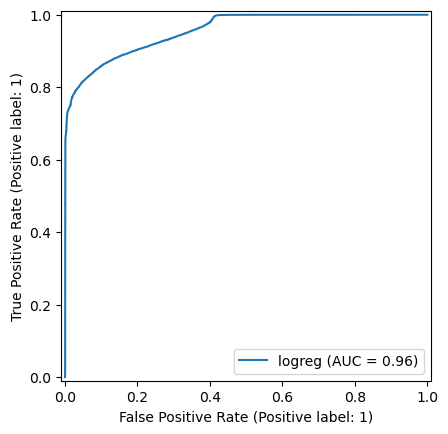

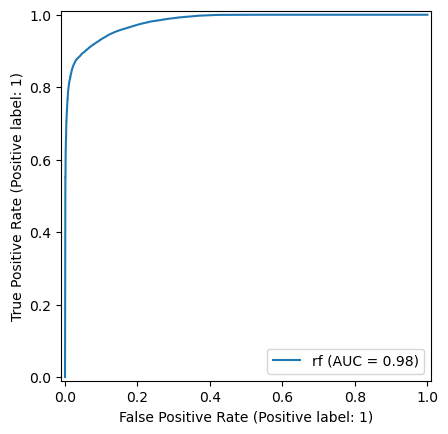

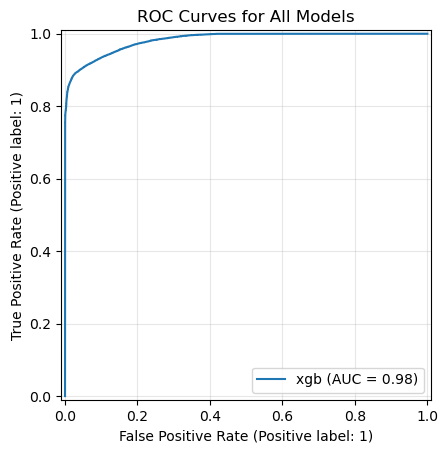

In [25]:
# Let's show 3 models on the same ROC chart...
plt.figure(figsize=(8, 6))
for name, y_prob in probabilities.items():
    if y_prob is not None:
        RocCurveDisplay.from_predictions(y_test, y_prob, name=name)

plt.title("ROC Curves for All Models")
plt.grid(True, alpha=0.3)
plt.show()


# 6. Feature Engineering

In this section, additional feature engineering steps are applied to improve model performance by introducing new, informative attributes derived from the original network flow features. Since identifier-related fields (e.g., IP addresses and port numbers) were already removed during the data cleaning stage to prevent learning artificially discriminative patterns, the feature engineering phase focuses solely on constructing meaningful numerical transformations. New ratio-based features are added to capture the proportional relationships between source and destination traffic characteristics, such as the balance of transmitted bytes. After feature engineering, a dedicated preprocessing pipeline is built, and the models are retrained to evaluate the effect of the engineered feature set on intrusion-detection performance.


In [26]:
X_train_fe = X_train.copy()
X_test_fe  = X_test.copy()


In [27]:
# Let's add a ratio feature to capture the relationship between source and destination byte values!

for df_ in (X_train_fe, X_test_fe):
    if {"sbytes", "dbytes"}.issubset(df_.columns):
        df_["byte_ratio"] = (df_["sbytes"] + 1) / (df_["dbytes"] + 1)

print("New feature added: byte_ratio")


New feature added: byte_ratio


In [28]:
# After feature engineering, we re-determine the numerical and categorical columns here.


num_cols_fe = X_train_fe.select_dtypes(include=["number"]).columns.tolist()
cat_cols_fe = [c for c in X_train_fe.columns if c not in num_cols_fe]

print("Numeric columns (FE):", len(num_cols_fe))
print("Categorical columns (FE):", len(cat_cols_fe))
print("Categorical cols:", cat_cols_fe)


Numeric columns (FE): 40
Categorical columns (FE): 3
Categorical cols: ['proto', 'service', 'state']


In [29]:
# We create a new preprocess pipeline.

numeric_pipe_fe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # Let's fill in the missing numerical values with the median again.
    ("scaler", StandardScaler())                    # Let's scale the numerical variables here too...
])

categorical_pipe_fe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")), # Let's fill in the missing categorical values!!
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess_fe = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe_fe, num_cols_fe),
        ("cat", categorical_pipe_fe, cat_cols_fe)
    ],
    remainder="drop"
)

print("preprocess_fe pipeline is ready.")


preprocess_fe pipeline is ready.


In [30]:
# Logistic Regression with FE
lr_fe = Pipeline([
    ("preprocess", preprocess_fe),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

# Random Forest with FE
rf_fe = Pipeline([
    ("preprocess", preprocess_fe),
    ("clf", RandomForestClassifier(
        n_estimators=400,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

# XGBoost with FE
xgb_fe = Pipeline([
    ("preprocess", preprocess_fe),
    ("clf", XGBClassifier(
        n_estimators=400,
        max_depth=4,
        learning_rate=0.05,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        random_state=42,
        n_jobs=-1,
        tree_method="hist",
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=scale_pos_weight
    ))
])

# We retrain our models after FE.
fitted_fe = {
    "logreg_fe": lr_fe.fit(X_train_fe, y_train),
    "rf_fe":     rf_fe.fit(X_train_fe, y_train),
    "xgb_fe":    xgb_fe.fit(X_train_fe, y_train)
}

print("Feature-engineered models trained.")


Feature-engineered models trained.


In [31]:
results_fe = {}

for name, model in fitted_fe.items():
    print(f"\nEvaluating {name} ...")
    res, _ = evaluate_model(model, X_test_fe, y_test, name)
    results_fe[name] = res


results_fe_df = pd.DataFrame(results_fe).T[["accuracy", "precision", "recall", "f1", "roc_auc"]]
print("\nFeature-engineered model results:")
display(results_fe_df.sort_values("f1", ascending=False))



Evaluating logreg_fe ...

=== LOGREG_FE ===
{'accuracy': 0.8359, 'precision': 0.8027, 'recall': 0.9309, 'f1': 0.862, 'roc_auc': 0.956}

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80     37000
           1       0.80      0.93      0.86     45332

    accuracy                           0.84     82332
   macro avg       0.85      0.83      0.83     82332
weighted avg       0.84      0.84      0.83     82332

Confusion matrix:
 [[26625 10375]
 [ 3132 42200]]

Evaluating rf_fe ...

=== RF_FE ===
{'accuracy': 0.8718, 'precision': 0.8178, 'recall': 0.9871, 'f1': 0.8945, 'roc_auc': 0.9809}

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.84     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.87     82332
weighted avg       0.89      0.87  

,accuracy,precision,recall,f1,roc_auc
xgb_fe,0.874095,0.821025,0.986345,0.896124,0.983524
rf_fe,0.871824,0.817843,0.987051,0.894515,0.980906
logreg_fe,0.835945,0.802663,0.930910,0.862043,0.955997


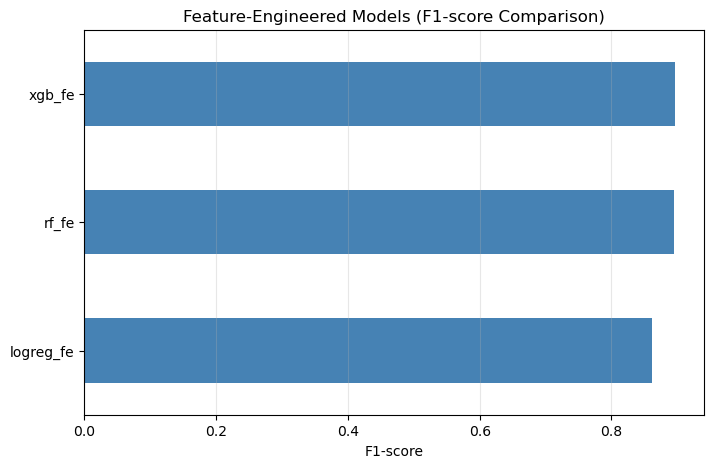

In [32]:
# F1 score comparison graph after feature engineering...

plt.figure(figsize=(8, 5))
results_fe_df["f1"].sort_values(ascending=True).plot(
    kind="barh", 
    color="steelblue"
)

plt.title("Feature-Engineered Models (F1-score Comparison)")
plt.xlabel("F1-score")
plt.grid(axis="x", alpha=0.3)
plt.show()


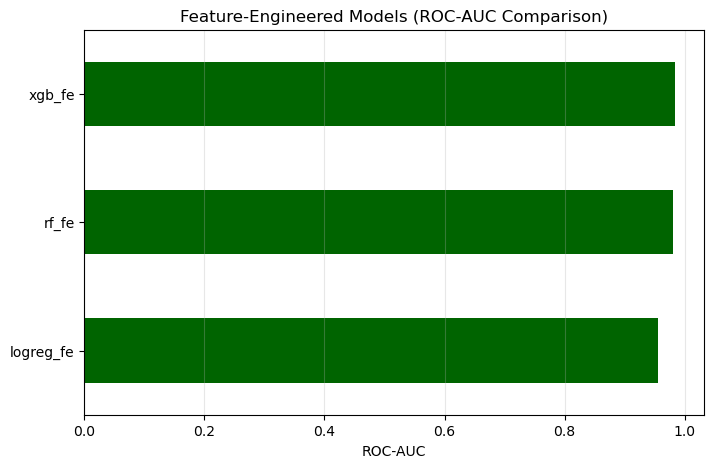

In [33]:
# New ROC-AUC comparison chart for models.

plt.figure(figsize=(8, 5))
results_fe_df["roc_auc"].sort_values(ascending=True).plot(
    kind="barh", 
    color="darkgreen"
)

plt.title("Feature-Engineered Models (ROC-AUC Comparison)")
plt.xlabel("ROC-AUC")
plt.grid(axis="x", alpha=0.3)
plt.show()


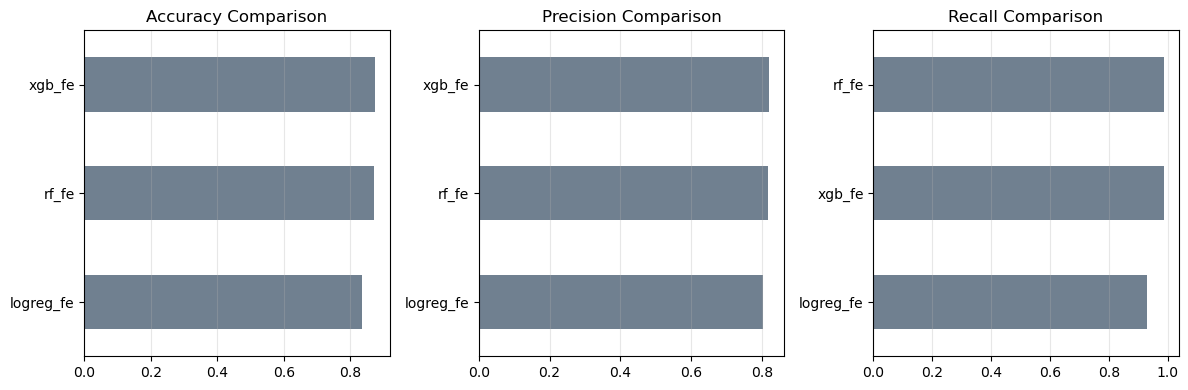

In [34]:
# Accuracy, Precision, Recall comparison charts:

metrics_to_plot = ["accuracy", "precision", "recall"]

plt.figure(figsize=(12, 4))

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(1, 3, i)
    results_fe_df[metric].sort_values(ascending=True).plot(
        kind="barh", color="slategray"
    )
    plt.title(f"{metric.capitalize()} Comparison")
    plt.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()


# 7. SHAP-Based Model Explainability

In this section, SHAP (SHapley Additive exPlanations) is used to interpret the
feature-engineered Random Forest model. Since tree-based ensemble methods are
naturally compatible with SHAP’s TreeExplainer framework, Random Forest provides
stable and reliable feature attributions without requiring approximation or
additional model-specific assumptions.

SHAP values quantify how much each feature contributes to shifting a prediction
toward the *attack* class or the *normal* class. To obtain a representative and
computationally efficient explanation, a subset of the test set is used. The
transformed feature space produced by the unified preprocessing pipeline is then
passed to TreeExplainer to compute:

- Global feature importance (mean absolute SHAP values),
- A SHAP summary (beeswarm) plot showing how high/low feature values influence
  model decisions across many samples.

This analysis reveals which engineered network-flow features most strongly drive
Random Forest’s intrusion-detection behavior and provides an interpretable
explanation of how the model distinguishes between benign and malicious traffic.

In [35]:
# Let's load the SHAP library.
import shap
shap.initjs()


In [36]:
# Let's create a function called "get_feature_names_from_ct" so that we can get the names of the transformed columns in the ColumnTransformer.
def get_feature_names_from_ct(column_transformer):
    """
    Extract feature names from a fitted ColumnTransformer,
    including expanded names from transformers such as OneHotEncoder.
    """
    feature_names = []

    for name, transformer, cols in column_transformer.transformers_:
        if name == "remainder":
            continue

        if hasattr(transformer, "named_steps"):
            last_step = list(transformer.named_steps.values())[-1]
        else:
            last_step = transformer

        if hasattr(last_step, "get_feature_names_out"):
            try:
                fn = last_step.get_feature_names_out(cols)
            except TypeError:
                fn = last_step.get_feature_names_out()
        else:
            fn = cols

        feature_names.extend(fn)

    return feature_names


In [37]:
# Let's select the indices for the test subset to be used in SHAP calculations.
# So, let's run our analysis on this sample subset...

shap_test_size = min(500, X_test_fe.shape[0])
shap_test_idx = np.random.choice(X_test_fe.index, size=shap_test_size, replace=False)

print("SHAP test subset size:", shap_test_size)


SHAP test subset size: 500


In [38]:
# SHAP analysis for Random Forest (FE) model

pre_rf = rf_fe.named_steps["preprocess"]
clf_rf = rf_fe.named_steps["clf"]

X_test_rf_small = pre_rf.transform(X_test_fe.loc[shap_test_idx])
feature_names_rf = get_feature_names_from_ct(pre_rf)

print("SHAP test shape (RF):", X_test_rf_small.shape)

explainer_rf = shap.TreeExplainer(clf_rf)
shap_values_rf = explainer_rf.shap_values(X_test_rf_small)


if hasattr(shap_values_rf, "ndim") and shap_values_rf.ndim == 3 and shap_values_rf.shape[2] == 2:
    shap_values_rf = shap_values_rf[:, :, 1]

print("SHAP values shape (RF):", shap_values_rf.shape)


SHAP test shape (RF): (500, 195)
SHAP values shape (RF): (500, 195)


/var/folders/vs/q57fpq9x0hn2dmj2kzsnfgx40000gn/T/ipykernel_36415/649396521.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


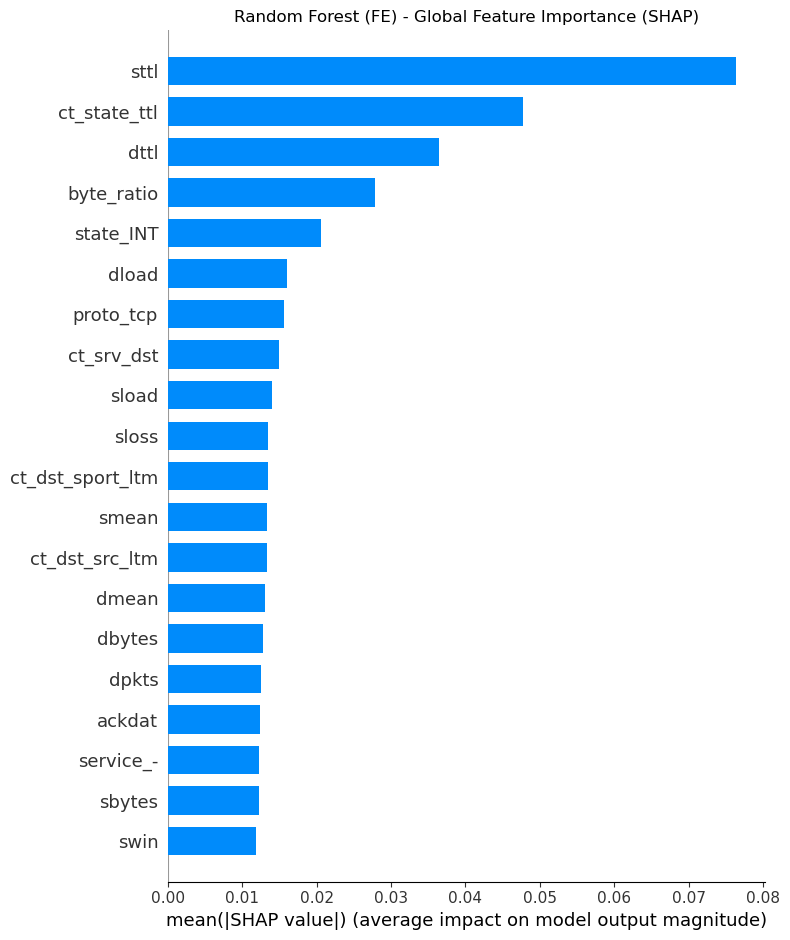

In [39]:
# Global SHAP importance for RF
shap.summary_plot(
    shap_values_rf,
    X_test_rf_small,
    feature_names=feature_names_rf,
    plot_type="bar",
    max_display=20,
    show=False
)
plt.title("Random Forest (FE) - Global Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

/var/folders/vs/q57fpq9x0hn2dmj2kzsnfgx40000gn/T/ipykernel_36415/2308674109.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


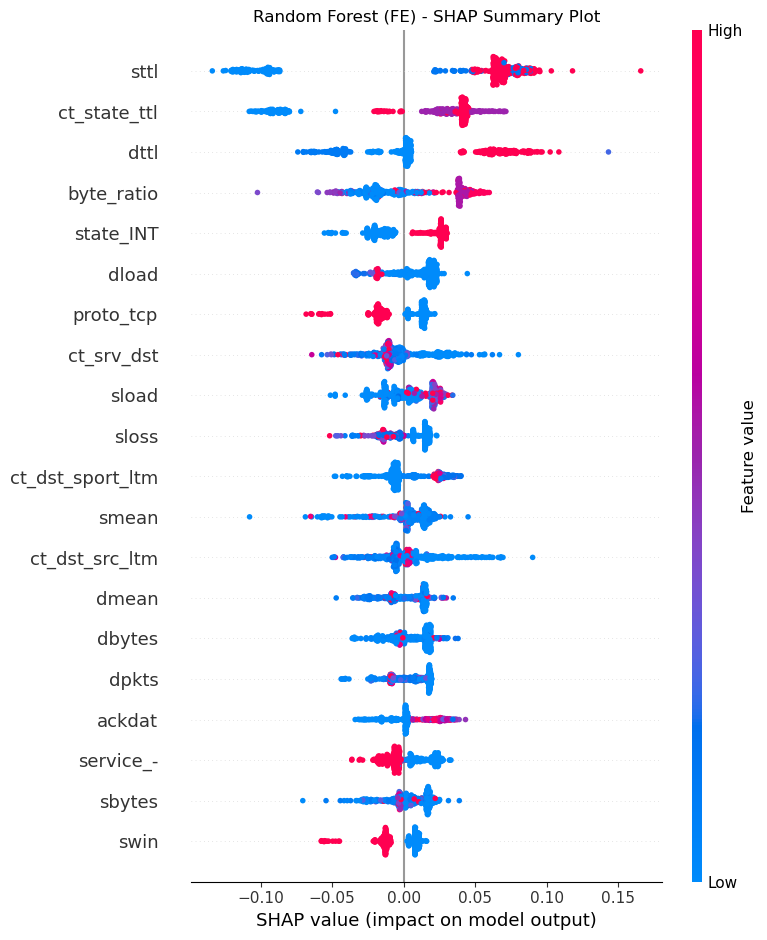

In [40]:
# SHAP scatter plot for Random Forest:
shap.summary_plot(
    shap_values_rf,
    X_test_rf_small,
    feature_names=feature_names_rf,
    max_display=20,
    show=False
)
plt.title("Random Forest (FE) - SHAP Summary Plot")
plt.tight_layout()
plt.show()

# 8. Ablation Study

This section evaluates how different feature-engineering components contribute
to the performance of the Random Forest classifier. To achieve this, three
ablation scenarios are tested, each removing or altering specific engineered
features while keeping the same preprocessing pipeline, hyperparameters, and
training procedure.

The following scenarios are evaluated:

1. **Baseline (No Feature Engineering):**  
   Only leakage-related columns (ID, IP addresses, and ports) are removed.
   No ratio-based or statistical aggregation features are added.

2. **Without `byte_ratio`:**  
   The full feature-engineered configuration is used except the `byte_ratio`
   feature, allowing us to measure the individual contribution of this ratio.

3. **Without Statistical Flow Features:**  
   All long-term flow statistics are removed, including all features starting
   with `ct_`, as well as `rate`, `sload`, `dload`, `sloss`, and `dloss`.

For each scenario, Random Forest is retrained, and performance is evaluated using
Accuracy, Precision, Recall, F1-score, and ROC-AUC. The results clearly show how
each feature-engineering element affects intrusion-detection performance.


In [41]:
# Our First Scenario: Baseline (without Feature Engineering)
drop_cols = ["id", "srcip", "dstip", "sport", "dsport"]
X_train_base = X_train.drop(columns=[c for c in drop_cols if c in X_train.columns])
X_test_base  = X_test.drop(columns=[c for c in drop_cols if c in X_test.columns])

num_cols_base = X_train_base.select_dtypes(include=["number"]).columns.tolist()
cat_cols_base = [c for c in X_train_base.columns if c not in num_cols_base]


# Our Second Scenario: The case without byte_ratio
X_train_no_ratio = X_train_fe.drop(columns=["byte_ratio"])
X_test_no_ratio  = X_test_fe.drop(columns=["byte_ratio"])

num_cols_no_ratio = X_train_no_ratio.select_dtypes(include=["number"]).columns.tolist()
cat_cols_no_ratio = [c for c in X_train_no_ratio.columns if c not in num_cols_no_ratio]

# Our third scenario: No streaming statistics
flow_stats = [c for c in X_train_fe.columns if c.startswith("ct_")] + [
    "rate", "sload", "dload", "sloss", "dloss"
]

X_train_no_flow = X_train_fe.drop(columns=[c for c in flow_stats if c in X_train_fe.columns])
X_test_no_flow  = X_test_fe.drop(columns=[c for c in flow_stats if c in X_test_fe.columns])

num_cols_no_flow = X_train_no_flow.select_dtypes(include=["number"]).columns.tolist()
cat_cols_no_flow = [c for c in X_train_no_flow.columns if c not in num_cols_no_flow]



print("Baseline shape:", X_train_base.shape)
print("No byte_ratio shape:", X_train_no_ratio.shape)
print("No flow stats shape:", X_train_no_flow.shape)


Baseline shape: (175341, 42)
No byte_ratio shape: (175341, 42)
No flow stats shape: (175341, 28)


In [42]:
def make_fe_pipeline(num_cols, cat_cols):
    numeric_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
    categorical_pipe = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])
    return ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, num_cols),
            ("cat", categorical_pipe, cat_cols)
        ],
        remainder="drop"
    )

def train_rf(X_train_s, y_train_s, num_cols_s, cat_cols_s):
    preprocess_s = make_fe_pipeline(num_cols_s, cat_cols_s)
    rf_s = Pipeline([
        ("preprocess", preprocess_s),
        ("clf", RandomForestClassifier(
            n_estimators=400,
            class_weight="balanced",
            n_jobs=-1,
            random_state=42
        ))
    ])
    return rf_s.fit(X_train_s, y_train_s)


In [43]:
results_ablation = {}

scenarios = {
    "baseline_no_FE": (X_train_base, X_test_base, num_cols_base, cat_cols_base),
    "no_byte_ratio": (X_train_no_ratio, X_test_no_ratio, num_cols_no_ratio, cat_cols_no_ratio),
    "no_flow_stats": (X_train_no_flow, X_test_no_flow, num_cols_no_flow, cat_cols_no_flow)
}

for name, (Xtr, Xte, numc, catc) in scenarios.items():
    print(f"\nTraining scenario: {name}")
    model_s = train_rf(Xtr, y_train, numc, catc)
    res, _ = evaluate_model(model_s, Xte, y_test, name)
    results_ablation[name] = res

ablation_df = (
    pd.DataFrame(results_ablation)
    .T[["accuracy", "precision", "recall", "f1", "roc_auc"]]
    .sort_values("f1", ascending=False)
)

print("\nAblation Study Results:")
display(ablation_df)



Training scenario: baseline_no_FE

=== BASELINE_NO_FE ===
{'accuracy': 0.87, 'precision': 0.8156, 'recall': 0.9871, 'f1': 0.8932, 'roc_auc': 0.9806}

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
weighted avg       0.89      0.87      0.87     82332

Confusion matrix:
 [[26885 10115]
 [  586 44746]]

Training scenario: no_byte_ratio

=== NO_BYTE_RATIO ===
{'accuracy': 0.87, 'precision': 0.8156, 'recall': 0.9871, 'f1': 0.8932, 'roc_auc': 0.9806}

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.73      0.83     37000
           1       0.82      0.99      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.90      0.86      0.86     82332
wei

,accuracy,precision,recall,f1,roc_auc
no_flow_stats,0.874520,0.829856,0.971234,0.894996,0.978726
baseline_no_FE,0.870026,0.815625,0.987073,0.893196,0.980590
no_byte_ratio,0.870026,0.815625,0.987073,0.893196,0.980590
